In [46]:
# INF2178
# Assignment 1
# Lan Li
# Student Number: 1005814326

# Set working directory
%cd /content/sample_data

/content/sample_data


In [47]:
# Import the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read the Excel file as data frame
df = pd.read_excel('INF2178_A1_data.xlsx')

# Display the first few rows of the dataframe
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


# Descriptive Analysis

CAPACITY_TYPE
Bed Based Capacity      964851
Room Based Capacity    1364674
Name: SERVICE_USER_COUNT, dtype: int64


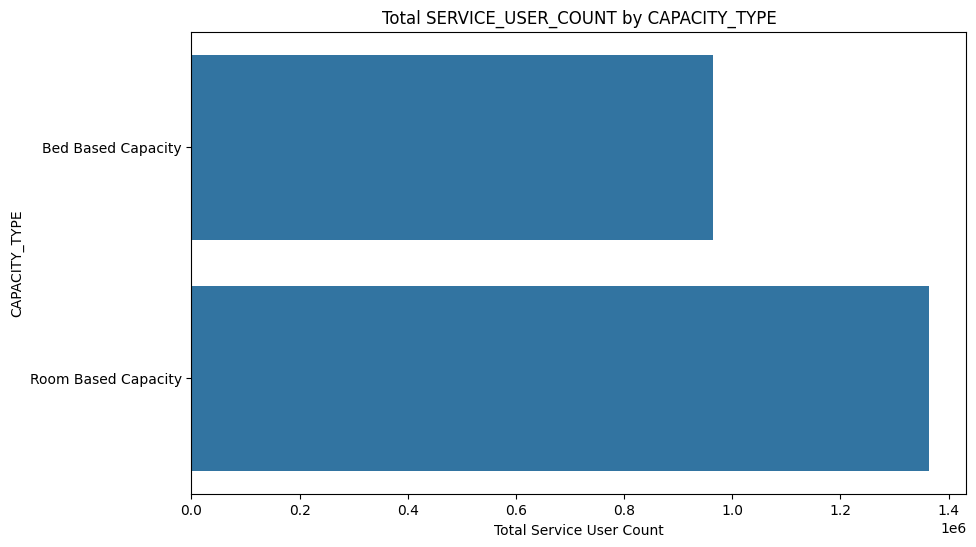

In [48]:
# Aggregate SERVICE_USER_COUNT by CAPACITY_TYPE
capacity_type_service_user_counts = df.groupby('CAPACITY_TYPE')['SERVICE_USER_COUNT'].sum()

# Print the aggregated service user counts by CAPACITY_TYPE
print(capacity_type_service_user_counts)

# Display the boxplot of sum of service users categoried by capacity type
plt.figure(figsize=(10, 6))
sns.barplot(x=capacity_type_service_user_counts.values, y=capacity_type_service_user_counts.index)
plt.title('Total SERVICE_USER_COUNT by CAPACITY_TYPE')
plt.xlabel('Total Service User Count')
plt.ylabel('CAPACITY_TYPE')
plt.show()

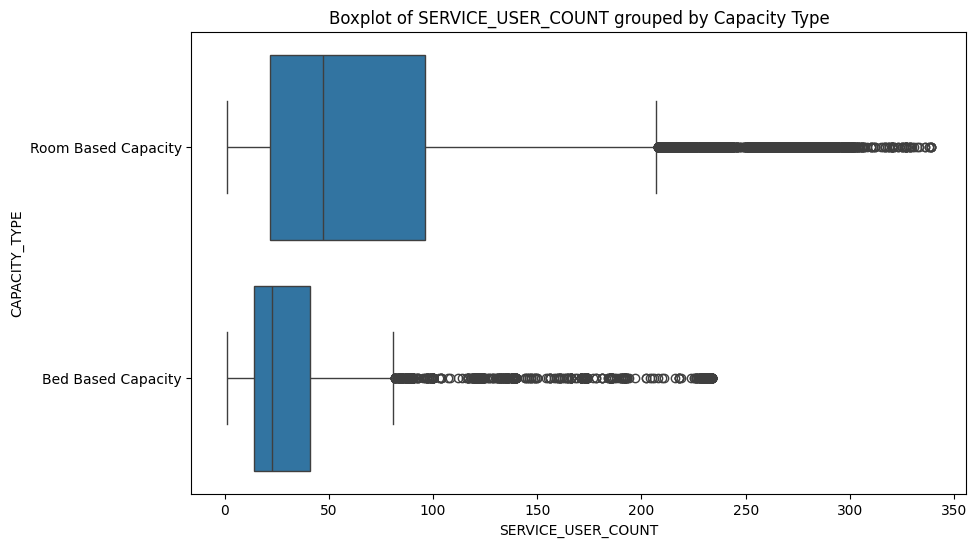

In [49]:
# Display the boxplot for different capacity type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SERVICE_USER_COUNT', y='CAPACITY_TYPE')
plt.title('Boxplot of SERVICE_USER_COUNT grouped by Capacity Type')
plt.show()

In [50]:
df.groupby('CAPACITY_TYPE')['SERVICE_USER_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
CAPACITY_TYPE,,,,,,,,
Bed Based Capacity,32399.0,29.780271,26.379416,1.0,14.0,23.0,41.0,234.0
Room Based Capacity,18545.0,73.587166,73.319030,1.0,22.0,47.0,96.0,339.0


In [51]:
# Welch's t-test
# Filter the data into two groups
bed_capacity_data = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']
room_capacity_data = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']

# Sample Sizes
bed_count = bed_capacity_data.count()
room_count = room_capacity_data.count()
# Degrees of freedom
dof = min(bed_count,room_count) - 1

# Perform the Welch's t-test
t_stat, p_value = stats.ttest_ind(bed_capacity_data.dropna(), room_capacity_data.dropna(), equal_var=False)
formatted_p_value = "{:.{}f}".format(p_value, 10)
print(f'T-statistic: {t_stat}')
print(f'P-value: {formatted_p_value}')

T-statistic: -78.50868849938448
P-value: 0.0000000000


SECTOR
Mixed Adult    964801
Men            488043
Families       449954
Women          265299
Youth          161428
Name: SERVICE_USER_COUNT, dtype: int64


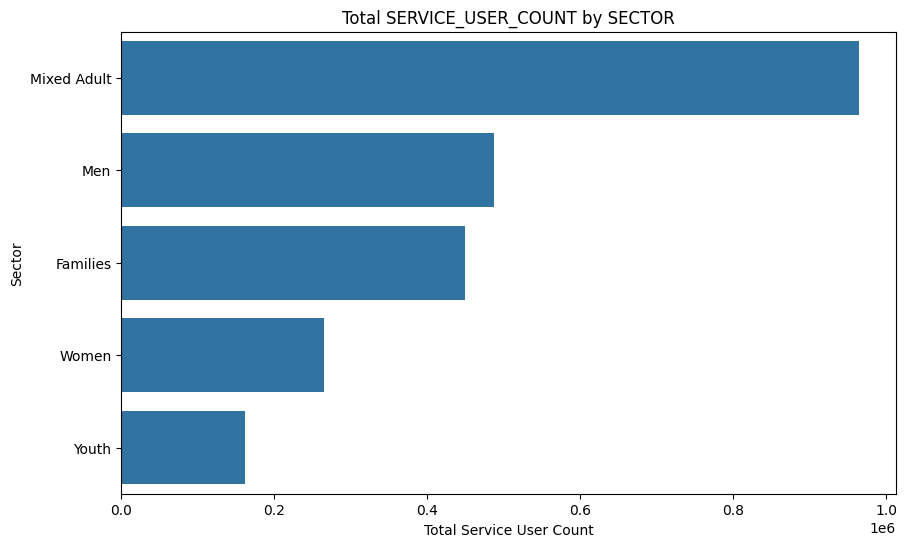

In [52]:
# Aggregate SERVICE_USER_COUNT by SECTOR
sector_service_user_counts = df.groupby('SECTOR')['SERVICE_USER_COUNT'].sum().sort_values(ascending=False)

# Print the aggregated service user counts by SECTOR
print(sector_service_user_counts)

# Display the boxplot of sum of service users categoried by sectors
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_service_user_counts.values, y=sector_service_user_counts.index)
plt.title('Total SERVICE_USER_COUNT by SECTOR')
plt.xlabel('Total Service User Count')
plt.ylabel('Sector')
plt.show()

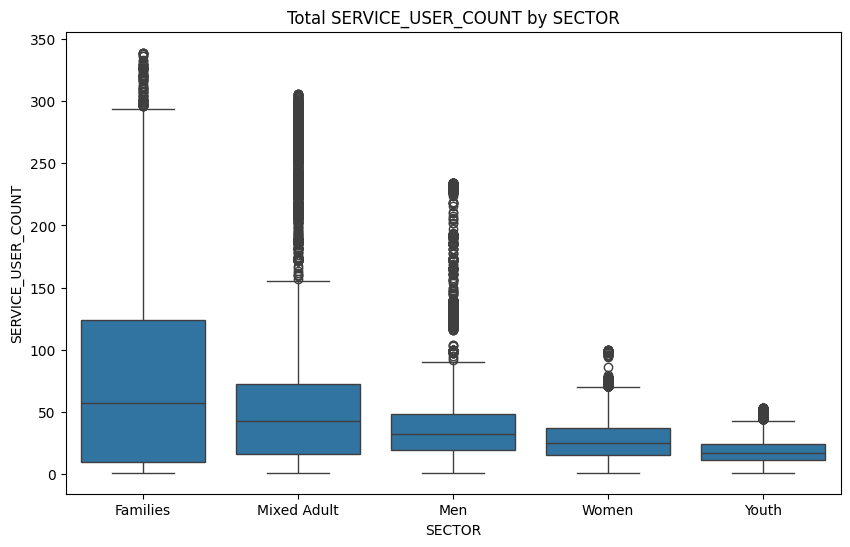

In [53]:
# Display the boxplot for different sectors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SECTOR', y='SERVICE_USER_COUNT')
plt.title('Total SERVICE_USER_COUNT by SECTOR')
plt.show()

PROGRAM_MODEL
Emergency       2038177
Transitional     291325
Name: SERVICE_USER_COUNT, dtype: int64


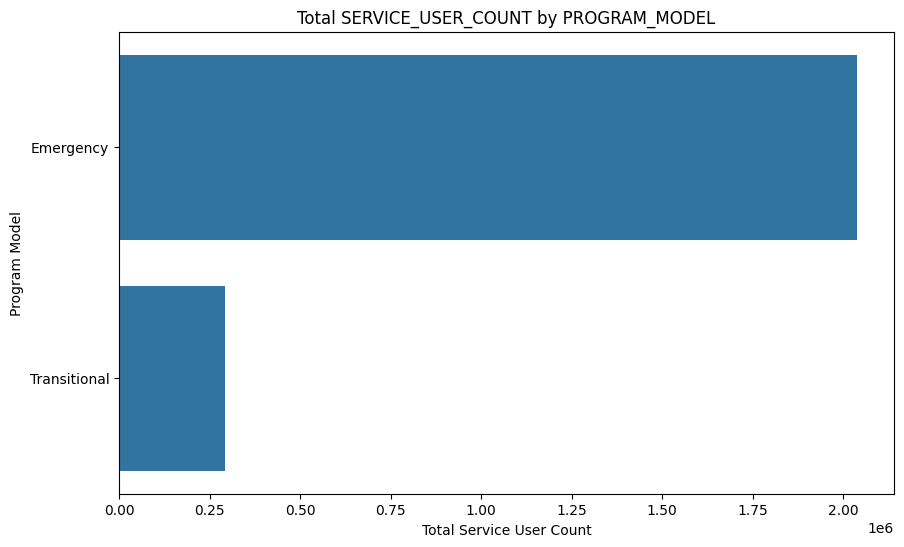

In [54]:
# Aggregate SERVICE_USER_COUNT by PROGRAM_MODEL
program_model_service_user_counts = df.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].sum()

# Print the aggregated service user counts by PROGRAM_MODEL
print(program_model_service_user_counts)

# Display the boxplot of sum of service users categoried by program model
plt.figure(figsize=(10, 6))
sns.barplot(x=program_model_service_user_counts.values, y=program_model_service_user_counts.index)
plt.title('Total SERVICE_USER_COUNT by PROGRAM_MODEL')
plt.xlabel('Total Service User Count')
plt.ylabel('Program Model')
plt.show()

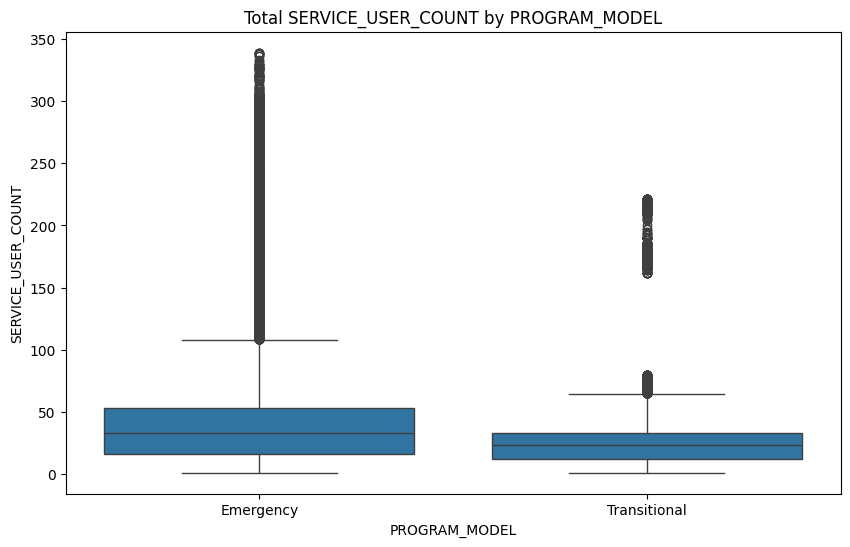

In [55]:
# Display the boxplot for different program models
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PROGRAM_MODEL', y='SERVICE_USER_COUNT')
plt.title('Total SERVICE_USER_COUNT by PROGRAM_MODEL')
plt.show()

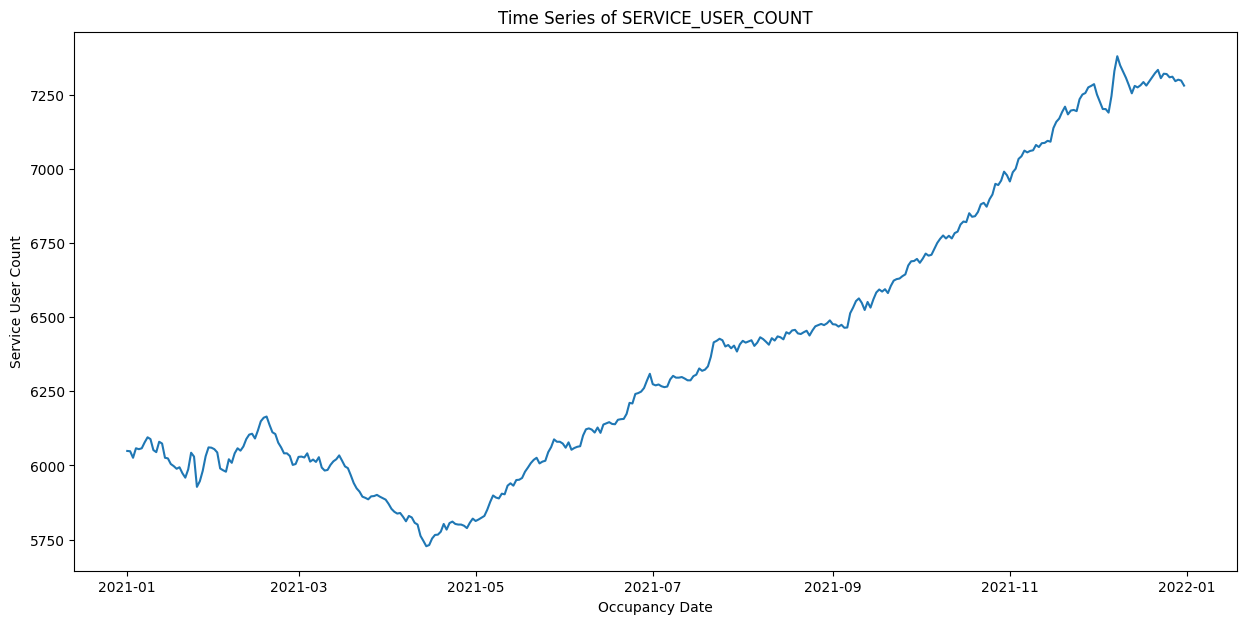

In [56]:
# Change the format to datetime
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

# Aggregate 'SERVICE_USER_COUNT' by 'OCCUPANCY_DATE'
time_series_user_data = df.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum().reset_index()

# Create a time series plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=time_series_user_data, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT')
plt.title('Time Series of SERVICE_USER_COUNT')
plt.xlabel('Occupancy Date')
plt.ylabel('Service User Count')
plt.show()

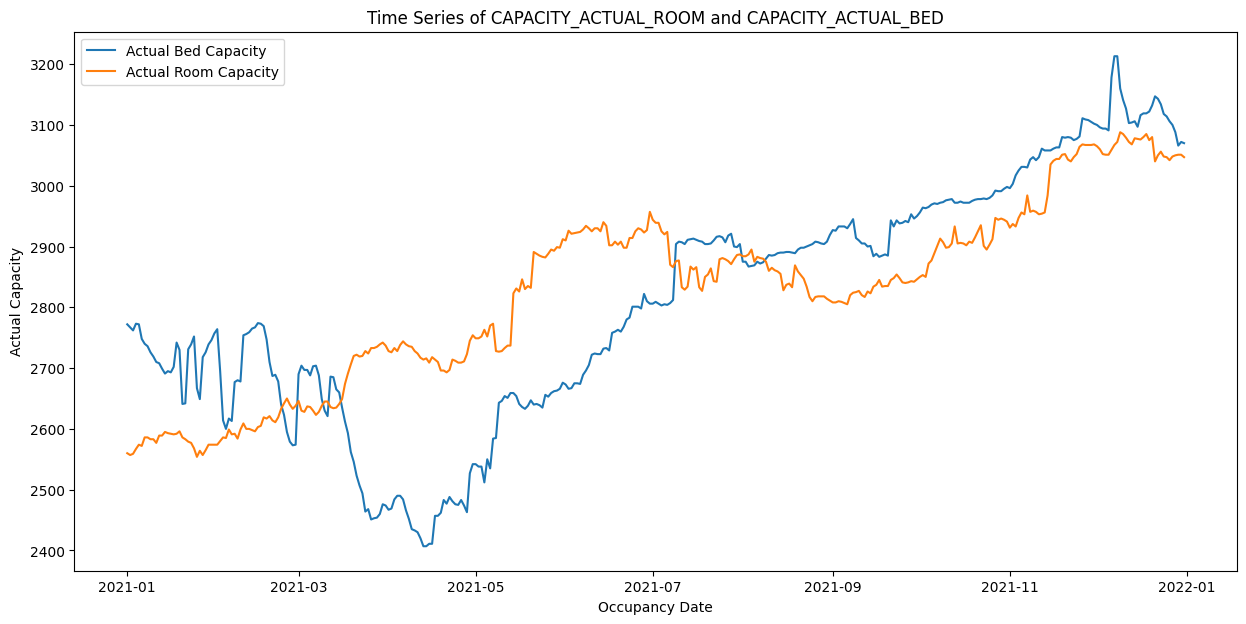

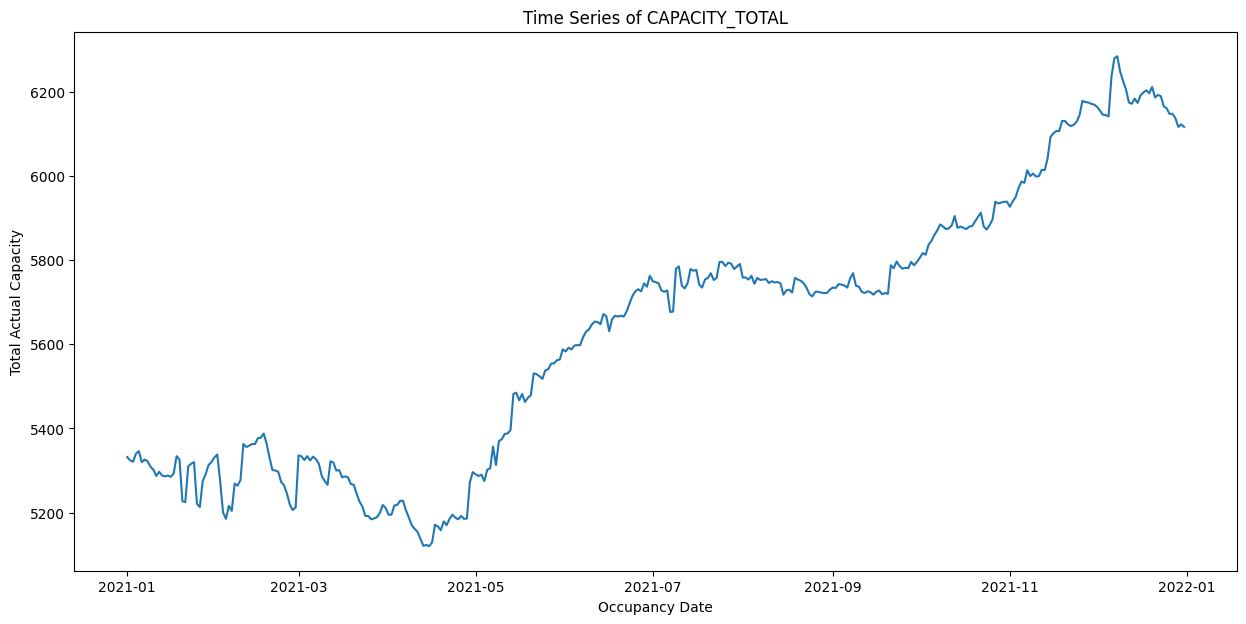

In [57]:
# Aggregate 'CAPACITY_ACTUAL_BED' by 'OCCUPANCY_DATE'
time_series_bed_data = df.groupby('OCCUPANCY_DATE')['CAPACITY_ACTUAL_BED'].sum().reset_index()

# Aggregate 'CAPACITY_ACTUAL_ROOM' by 'OCCUPANCY_DATE'
time_series_room_data = df.groupby('OCCUPANCY_DATE')['CAPACITY_ACTUAL_ROOM'].sum().reset_index()

# Aggregate 'CAPACITY_TOTAL' by 'OCCUPANCY_DATE'
time_series_total_data = pd.DataFrame({
    'OCCUPANCY_DATE': time_series_bed_data['OCCUPANCY_DATE'],
    'CAPACITY_TOTAL': time_series_bed_data['CAPACITY_ACTUAL_BED'] +
    time_series_room_data['CAPACITY_ACTUAL_ROOM']})

# Create a time series plot for actual capacity of bed and of room
plt.subplots(figsize=(15, 7))
sns.lineplot(data=time_series_bed_data, x='OCCUPANCY_DATE', y='CAPACITY_ACTUAL_BED', label='Actual Bed Capacity')
sns.lineplot(data=time_series_room_data, x='OCCUPANCY_DATE', y='CAPACITY_ACTUAL_ROOM', label='Actual Room Capacity')
plt.title('Time Series of CAPACITY_ACTUAL_ROOM and CAPACITY_ACTUAL_BED')
plt.xlabel('Occupancy Date')
plt.ylabel('Actual Capacity')
plt.legend()
plt.show()

# Create a time series plot for the total capacity of bed and room
plt.figure(figsize=(15, 7))
sns.lineplot(data=time_series_total_data, x='OCCUPANCY_DATE', y='CAPACITY_TOTAL')
plt.title('Time Series of CAPACITY_TOTAL')
plt.xlabel('Occupancy Date')
plt.ylabel('Total Actual Capacity')
plt.show()

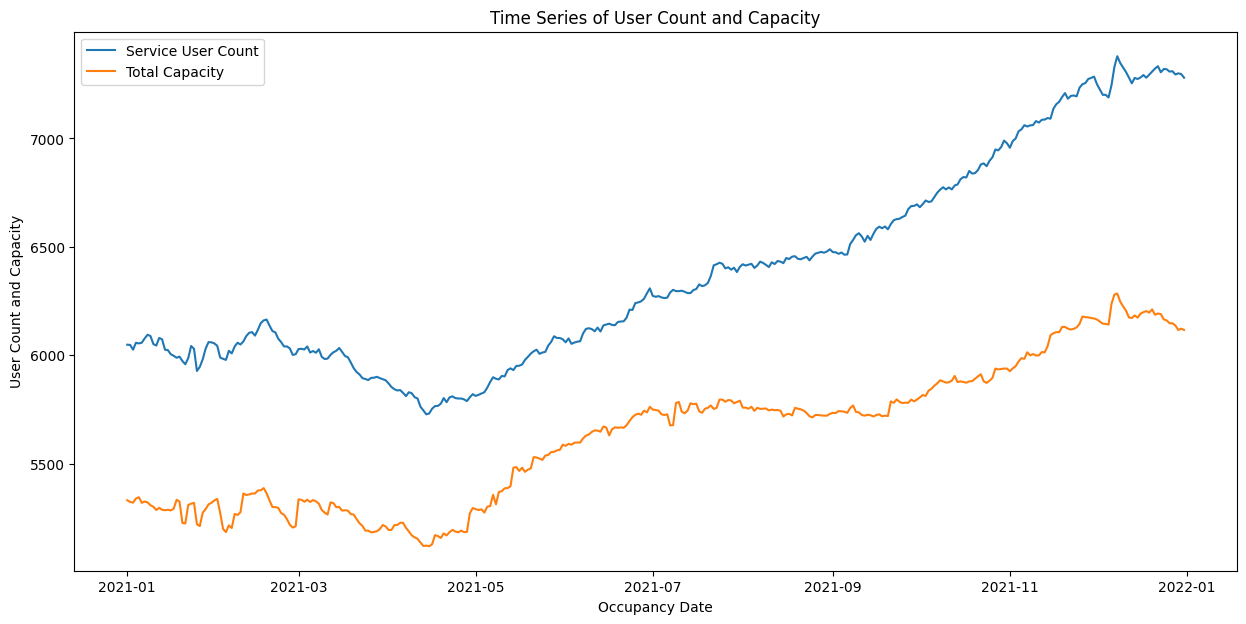

In [58]:
# Create a time series plot for the total capacity and service user count
plt.figure(figsize=(15, 7))
sns.lineplot(data=time_series_user_data, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT', label='Service User Count')
sns.lineplot(data=time_series_total_data, x='OCCUPANCY_DATE', y='CAPACITY_TOTAL', label='Total Capacity')
plt.title('Time Series of User Count and Capacity')
plt.xlabel('Occupancy Date')
plt.ylabel('User Count and Capacity')
plt.show()

In [59]:
# Calculate occupancy rate for beds and rooms
df['OCCUPANCY_RATE_BED'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['OCCUPANCY_RATE_ROOM'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571


In [60]:
# Welch's t-test
# Filter the data into two groups
occupancy_rate_bed_data = df['OCCUPANCY_RATE_BED']
occupancy_rate_room_data = df['OCCUPANCY_RATE_ROOM']
# Sample Sizes
occupancy_rate_bed_count = occupancy_rate_bed_data.count()
occupancy_rate_room_count = occupancy_rate_room_data.count()
# Degrees of freedom
dof = min(occupancy_rate_bed_count,occupancy_rate_room_count) - 1

# Perform the Welch's t-test
t_stat, p_value = stats.ttest_ind(occupancy_rate_bed_data.dropna(), occupancy_rate_room_data.dropna(), equal_var=False)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -4.498751771925636
P-value: 6.860477551487939e-06


In [61]:
df['OCCUPANCY_RATE_BED'].describe()

count    32399.000000
mean         0.927885
std          0.122562
min          0.022727
25%          0.900000
50%          1.000000
75%          1.000000
max          1.000000
Name: OCCUPANCY_RATE_BED, dtype: float64

In [62]:
df['OCCUPANCY_RATE_ROOM'].describe()

count    18545.000000
mean         0.934087
std          0.163241
min          0.012048
25%          0.958333
50%          1.000000
75%          1.000000
max          1.014085
Name: OCCUPANCY_RATE_ROOM, dtype: float64

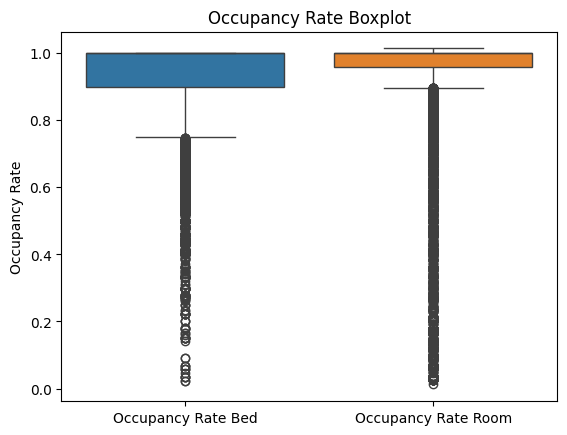

In [63]:
sns.boxplot(data=df[['OCCUPANCY_RATE_BED', 'OCCUPANCY_RATE_ROOM']])

# Customize the plot
plt.xticks([0, 1], ['Occupancy Rate Bed', 'Occupancy Rate Room'])
plt.ylabel('Occupancy Rate')
plt.title('Occupancy Rate Boxplot')

# Display the plot
plt.show()

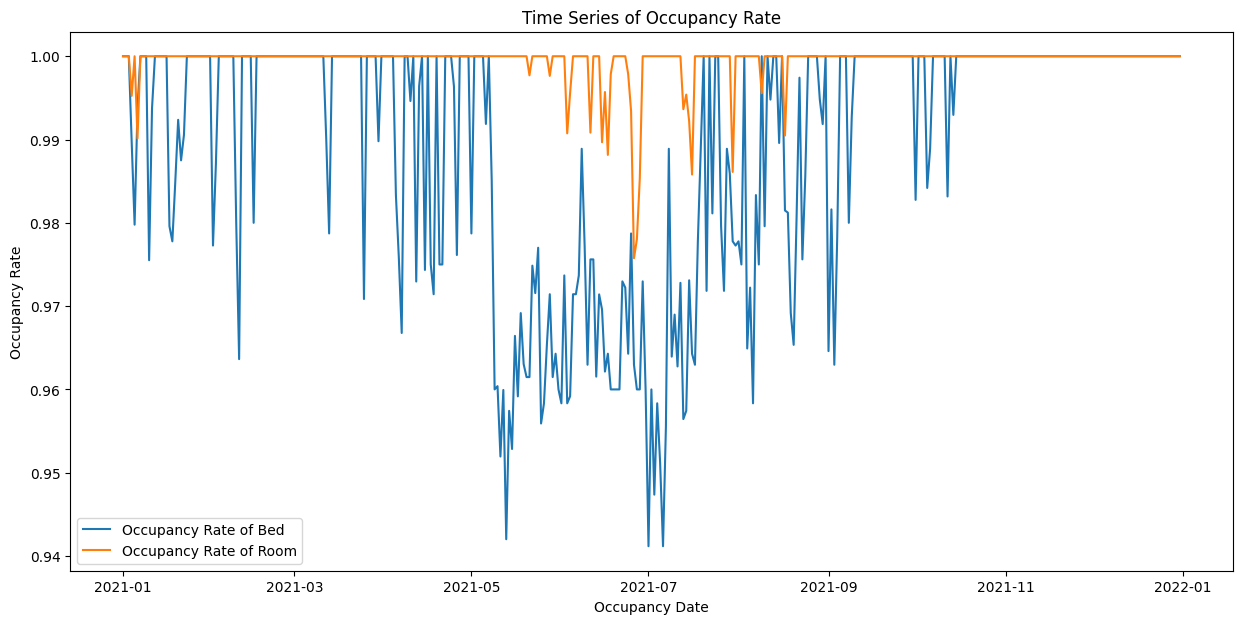

In [64]:
# Take the median of 'OCCUPANCY_RATE_BED' by 'OCCUPANCY_DATE'
time_series_bed_rate_data = df.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE_BED'].median().reset_index()

# Take the median of 'OCCUPANCY_RATE_ROOM' by 'OCCUPANCY_DATE'
time_series_room_rate_data = df.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE_ROOM'].median().reset_index()

# Create a time series plot for occupancy rates of bed and room
plt.subplots(figsize=(15, 7))
sns.lineplot(data=time_series_bed_rate_data, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE_BED', label='Occupancy Rate of Bed')
sns.lineplot(data=time_series_room_rate_data, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE_ROOM', label='Occupancy Rate of Room')
plt.title('Time Series of Occupancy Rate')
plt.xlabel('Occupancy Date')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()